## Modeling

Describe and justify the process for analyzing or modeling the data.

Questions to consider:

- How did you analyze the data to arrive at an initial approach?
- How did you iterate on your initial approach to make it better?
- Why are these choices appropriate given the data and the business problem?

## Evaluation

The evaluation of each model should accompany the creation of each model, and you should be sure to evaluate your models consistently.

Evaluate how well your work solves the stated business problem. 

Questions to consider:

- How do you interpret the results?
- How well does your model fit your data? How much better is this than your baseline model? Is it over or under fit?
- How well does your model/data fit any modeling assumptions?

For the final model, you might also consider:

- How confident are you that your results would generalize beyond the data you have?
- How confident are you that this model would benefit the business if put into use?

### Baseline Understanding

- What does a baseline, model-less prediction look like?

In [1]:
# code here to arrive at a baseline prediction

### Import our Final CSV from our Data Preparation and Cleaning Notebook

In [2]:
#Import libraries
# Standard Packages
import pandas as pd
import numpy as np

# Viz Packages
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Scipy Stats
import scipy.stats as stats 

# Statsmodel Api
import statsmodels.api as sm
from statsmodels.formula.api import ols

# SKLearn Modules
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler,  OrdinalEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

# Suppress future and deprecation warnings
import warnings
warnings.filterwarnings("ignore", category= FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [3]:
#Importing file from Aidan's Comp
final_kc_df = pd.read_csv('/Users/Aidan/Documents/Flatiron/Phase_2/King-County-House-Sales-/final_kc.csv')

In [4]:
#Importing file from Ash's Comp
# final_kc_df = pd.read_csv('/Users/aheinke/Documents/Flatiron/NYC-DS-010923/Phase_2/Phase2_Final_Proj/final_kc.csv')

In [5]:
#Reminder of what it looks like.
final_kc_df.head()

,Unnamed: 0,index,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,...,address,lat,long,Zip Code,DistrictName,ELA,Math,Science,District Test Score,zipcodes
0,0,0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,...,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052,98055,Renton School District,42.9,32.5,33.3,36.23,"['98006', '98031', '98032', '98055', '98056', ..."
1,1,11,2873000690,6/11/2021,680000.0,4,3.0,2130,7649,1.0,...,"20432 130th Place Southeast, Kent, Washington ...",47.418155,-122.16696,98031,Renton School District,42.9,32.5,33.3,36.23,"['98006', '98031', '98032', '98055', '98056', ..."
2,2,22,7231501575,12/28/2021,450000.0,2,1.0,900,6000,1.0,...,"533 Wells Avenue South, Renton, Washington 980...",47.475360,-122.20573,98057,Renton School District,42.9,32.5,33.3,36.23,"['98006', '98031', '98032', '98055', '98056', ..."
3,3,25,2095600170,10/8/2021,580000.0,3,3.0,2020,4482,1.0,...,"22609 102nd Place Southeast, Kent, Washington ...",47.399470,-122.20413,98031,Renton School District,42.9,32.5,33.3,36.23,"['98006', '98031', '98032', '98055', '98056', ..."
4,4,30,9320600110,8/18/2021,500000.0,3,1.5,1140,9690,1.0,...,"9812 South 212th Street, Kent, Washington 9803...",47.411835,-122.20954,98031,Renton School District,42.9,32.5,33.3,36.23,"['98006', '98031', '98032', '98055', '98056', ..."


In [6]:
#Remove uninformative columns 
final_kc_df= final_kc_df.drop(labels=['index','id', 'date','Unnamed: 0','address','lat','long', 'yr_renovated',\
                                     'zipcodes'], axis=1)

In [7]:
#Let's look at our shape after removing those columns.
final_kc_df.shape

(29171, 25)

In [8]:
final_kc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29171 entries, 0 to 29170
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                29171 non-null  float64
 1   bedrooms             29171 non-null  int64  
 2   bathrooms            29171 non-null  float64
 3   sqft_living          29171 non-null  int64  
 4   sqft_lot             29171 non-null  int64  
 5   floors               29171 non-null  float64
 6   waterfront           29171 non-null  object 
 7   greenbelt            29171 non-null  object 
 8   nuisance             29171 non-null  object 
 9   view                 29171 non-null  object 
 10  condition            29171 non-null  object 
 11  grade                29171 non-null  object 
 12  heat_source          29171 non-null  object 
 13  sewer_system         29171 non-null  object 
 14  sqft_above           29171 non-null  int64  
 15  sqft_basement        29171 non-null 

### First  Model

Using only numeric data where we have integer or float values. Not using `Science` Test Scores due to its Null values since Skykomish School District does note have scores.

In [9]:
# Prepare data
X = final_kc_df.drop(['price','waterfront','greenbelt','view','condition', 'grade', 'heat_source',\
                      'sewer_system', 'nuisance', 'DistrictName', 'Science'], axis=1)
y = final_kc_df['price']

In [10]:
# Test/Train Split: Train is 80% of Data, Test is 20% of Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [11]:
# Instantiate model
lr_simple_model = LinearRegression()

# Fit model
first_result = lr_simple_model.fit(X_train, y_train)

In [12]:
# Retrieve estimated slope coefficient
first_result.coef_

array([-1.46579366e+05,  1.28660794e+05,  2.71140105e+02,  1.30730041e-01,
       -6.75387915e+04,  3.17179967e+02,  1.36036566e+02, -1.39166302e+02,
        2.22984075e+02, -2.72278103e+03,  7.44511474e+02,  3.98629808e+03,
        3.02912883e+04, -2.12646124e+04])

In [13]:
# Retrieve estimated y-intercept coefficient
first_result.intercept_

-68028501.90766136

In [14]:
#GIVES US OUR R**2
print("First Model Train:" , lr_simple_model.score(X_train, y_train))
print("First Model Test:" , lr_simple_model.score(X_test, y_test))

First Model Train: 0.48656816465982333
First Model Test: 0.5119899028835484


In [15]:
#MEAN ABSOLUTE ERROR
metrics.mean_absolute_error(y_test, lr_simple_model.predict(X_test))

352353.36107653956

INTERPRETATION OF FIRST MODEL GOES HERE

### Modeling Iterations

Before we create another model we should look for Multicollinearity and ensure that our predictive variables are indeed independent.

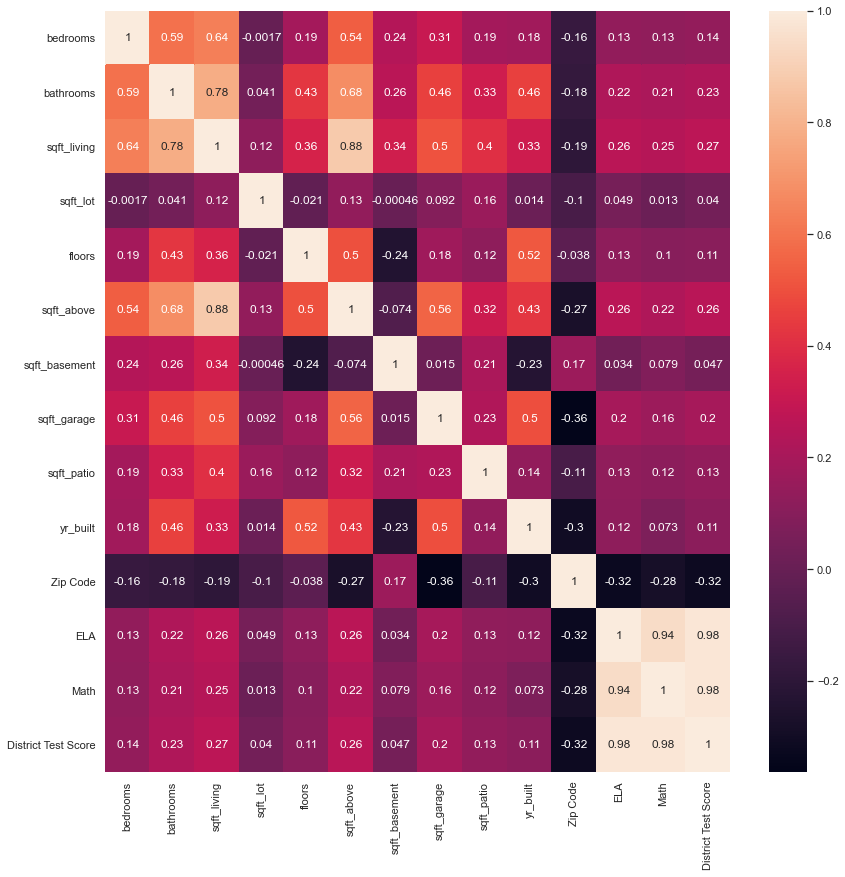

In [16]:
#Heatmap for Collinearity
sns.set(rc={'figure.figsize':(14, 14)})
sns.heatmap(X_train.corr(),annot=True);

In [17]:
#View Correlation between Independent Numeric Variables
X_train.corr()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,Zip Code,ELA,Math,District Test Score
bedrooms,1.000000,0.592982,0.636945,-0.001679,0.193921,0.541070,0.239439,0.306055,0.194604,0.181470,-0.160863,0.133511,0.131035,0.139570
bathrooms,0.592982,1.000000,0.780150,0.040826,0.429420,0.679883,0.263482,0.460655,0.333332,0.456992,-0.176279,0.223574,0.213246,0.225269
sqft_living,0.636945,0.780150,1.000000,0.121821,0.356021,0.881117,0.335551,0.504983,0.404422,0.328646,-0.193462,0.261937,0.246240,0.265761
sqft_lot,-0.001679,0.040826,0.121821,1.000000,-0.021275,0.132321,-0.000465,0.092211,0.161519,0.014009,-0.102327,0.048849,0.012596,0.040447
floors,0.193921,0.429420,0.356021,-0.021275,1.000000,0.504333,-0.240184,0.179701,0.124448,0.522993,-0.037590,0.125537,0.102862,0.109355
sqft_above,0.541070,0.679883,0.881117,0.132321,0.504333,1.000000,-0.074031,0.556861,0.320018,0.429417,-0.267618,0.261920,0.224180,0.258395
sqft_basement,0.239439,0.263482,0.335551,-0.000465,-0.240184,-0.074031,1.000000,0.015303,0.212245,-0.228894,0.165875,0.034354,0.078852,0.046735
sqft_garage,0.306055,0.460655,0.504983,0.092211,0.179701,0.556861,0.015303,1.000000,0.229210,0.495794,-0.363107,0.196897,0.164113,0.199270
sqft_patio,0.194604,0.333332,0.404422,0.161519,0.124448,0.320018,0.212245,0.229210,1.000000,0.135812,-0.107332,0.128419,0.120195,0.132194
yr_built,0.181470,0.456992,0.328646,0.014009,0.522993,0.429417,-0.228894,0.495794,0.135812,1.000000,-0.299281,0.124317,0.073143,0.113178


INTERPRETATION OF WHICH VARIABLES ARE CORRELATED HERE

### Second Model

Adding in categorical data to our model and dropping `sqft_above` as it too closely correlates with `sqft_living`. Again we are removing `Science` as it contains null values due to Skykomish School District not having scores.

In [18]:
final_kc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29171 entries, 0 to 29170
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                29171 non-null  float64
 1   bedrooms             29171 non-null  int64  
 2   bathrooms            29171 non-null  float64
 3   sqft_living          29171 non-null  int64  
 4   sqft_lot             29171 non-null  int64  
 5   floors               29171 non-null  float64
 6   waterfront           29171 non-null  object 
 7   greenbelt            29171 non-null  object 
 8   nuisance             29171 non-null  object 
 9   view                 29171 non-null  object 
 10  condition            29171 non-null  object 
 11  grade                29171 non-null  object 
 12  heat_source          29171 non-null  object 
 13  sewer_system         29171 non-null  object 
 14  sqft_above           29171 non-null  int64  
 15  sqft_basement        29171 non-null 

In [19]:
#Dropping columns
final_kc_df2 = final_kc_df.drop(['sqft_above', 'nuisance', 'waterfront', 'greenbelt','view', 'Science'], axis = 1)

##### Preparing Data

In [20]:
#Defining variables for 2nd model
X = final_kc_df2.drop('price', axis=1)
y = final_kc_df2['price']

##### Train/Test Split
*Train 80% of Data, Test 20% of Data*

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

##### Processing Data

In [22]:
#Train Data
y_train.shape

(23336,)

In [23]:
#Test Data
y_test.shape

(5835,)

##### Separate Continuous X Predictive Variables
*Train Data*

In [24]:
#Define our columns with numeric data- same as First Model
numeric_cols = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','sqft_basement',\
                           'sqft_garage','sqft_patio','yr_built','ELA','Math','Zip Code','District Test Score']

In [25]:
X_train_numeric = X_train[numeric_cols]

*Test Data*

In [26]:
X_test_numeric = X_test[numeric_cols]

##### Discrete Ordinal X Predictive Variables
*Train Data*

In [27]:
ord_cat_selector = ['condition', 'grade']
X_train_ord_cat_subset = X_train[ord_cat_selector]

In [28]:
X_train_ord_cat_subset['condition'].unique()

array(['Good', 'Average', 'Very Good', 'Poor', 'Fair'], dtype=object)

In [29]:
X_train_ord_cat_subset['grade'].unique()

array(['9 Better', '7 Average', '8 Good', '6 Low Average', '11 Excellent',
       '10 Very Good', '5 Fair', '4 Low', '3 Poor', '12 Luxury',
       '13 Mansion', '2 Substandard'], dtype=object)

In [30]:
# REPLACE WITH COLUMN'S UNIQUE VALUES IN ASCENDING ORDER --->
condition_list = ['Poor', 'Fair', 'Average', 'Good', 'Very Good'] 
grade_list = ['2 Substandard','3 Poor','4 Low', '5 Fair', '6 Low Average', '7 Average','8 Good','9 Better',\
              '10 Very Good','11 Excellent','12 Luxury','13 Mansion']

In [31]:
o_enc = OrdinalEncoder(categories = [condition_list, grade_list])
o_enc.fit(X_train_ord_cat_subset)

OrdinalEncoder(categories=[['Poor', 'Fair', 'Average', 'Good', 'Very Good'],
                           ['2 Substandard', '3 Poor', '4 Low', '5 Fair',
                            '6 Low Average', '7 Average', '8 Good', '9 Better',
                            '10 Very Good', '11 Excellent', '12 Luxury',
                            '13 Mansion']])

In [32]:
o_enc.transform(X_train_ord_cat_subset)

array([[3., 7.],
       [3., 5.],
       [3., 5.],
       ...,
       [3., 5.],
       [4., 5.],
       [2., 6.]])

In [33]:
X_train_ord = pd.DataFrame(o_enc.transform(X_train_ord_cat_subset),
                        columns = X_train_ord_cat_subset.columns)

In [34]:
X_train_ord.head()

,condition,grade
0,3.0,7.0
1,3.0,5.0
2,3.0,5.0
3,2.0,6.0
4,2.0,6.0


*Test Data*

In [35]:
X_test_ord_cat_subset = X_test[ord_cat_selector]

In [36]:
X_test_ord = pd.DataFrame(o_enc.transform(X_test_ord_cat_subset),
                        columns = X_test_ord_cat_subset.columns)

##### Discrete Nominal X Predictive Variables
*Train Data*

In [37]:
onehot_enc = OneHotEncoder(sparse = False, handle_unknown = 'ignore')

In [38]:
nominal_cols = ['heat_source', 'sewer_system', 'DistrictName']
onehot_enc.fit_transform(X_train[nominal_cols])

array([[0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [39]:
X_train_nom_trans = onehot_enc.fit_transform(X_train[nominal_cols])
X_train_nom_trans.shape

(23336, 29)

In [40]:
cols = onehot_enc.get_feature_names()

In [41]:
X_train_nom = pd.DataFrame(X_train_nom_trans, columns = cols)
X_train_nom.head()

,x0_Electricity,x0_Electricity/Solar,x0_Gas,x0_Gas/Solar,x0_Oil,x0_Oil/Solar,x0_Other,x1_PRIVATE,x1_PRIVATE RESTRICTED,x1_PUBLIC,...,x2_Northshore School District,x2_Renton School District,x2_Riverview School District,x2_Seattle School District No. 1,x2_Shoreline School District,x2_Skykomish School District,x2_Snoqualmie Valley School District,x2_Tahoma School District,x2_Tukwila School District,x2_Vashon Island School District
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


*Test Data*

In [42]:
X_test_nom_trans = onehot_enc.transform(X_test[nominal_cols])
X_test_nom_trans.shape

(5835, 29)

In [43]:
X_test_nom = pd.DataFrame(X_test_nom_trans, columns = cols)

##### Combine Discrete/Categorical X/ Predictive Variables

In [44]:
#combine all catergorical variables

X_train_cat_df = pd.concat([X_train_ord,X_train_nom],axis = 1)
X_train_cat_df

,condition,grade,x0_Electricity,x0_Electricity/Solar,x0_Gas,x0_Gas/Solar,x0_Oil,x0_Oil/Solar,x0_Other,x1_PRIVATE,...,x2_Northshore School District,x2_Renton School District,x2_Riverview School District,x2_Seattle School District No. 1,x2_Shoreline School District,x2_Skykomish School District,x2_Snoqualmie Valley School District,x2_Tahoma School District,x2_Tukwila School District,x2_Vashon Island School District
0,3.0,7.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,3.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,5.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.0,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.0,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23331,3.0,6.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23332,4.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
23333,3.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23334,4.0,5.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


*Test Data*

In [45]:
X_test_cat_df = pd.concat([X_test_ord,X_test_nom],axis = 1)

#### Combine Continuous and Discrete X/ Predictive Variables

In [46]:
#Train Data - Combine all processed X Variables
X_process_train = pd.concat([X_train_numeric.reset_index(),X_train_cat_df],axis = 1)

In [47]:
X_process_train.head()

,index,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_basement,sqft_garage,sqft_patio,yr_built,...,x2_Northshore School District,x2_Renton School District,x2_Riverview School District,x2_Seattle School District No. 1,x2_Shoreline School District,x2_Skykomish School District,x2_Snoqualmie Valley School District,x2_Tahoma School District,x2_Tukwila School District,x2_Vashon Island School District
0,28186,4,2.5,2590,14468,1.0,960,530,240,1977,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,4121,4,2.0,1980,7200,1.0,990,0,110,1946,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,9733,3,1.5,940,5625,1.5,670,0,160,1926,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,20141,3,2.5,2010,4712,2.0,0,450,140,2012,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,27796,4,3.0,2590,7213,2.0,0,640,96,2001,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
X_process_train.shape

(23336, 45)

*Test Data*

In [49]:
X_process_test = pd.concat([X_test_numeric.reset_index(),X_test_cat_df],axis = 1)

#### Scale the Data

In [50]:
# Now we'll apply it to our data by using the .fit() (calculates stds and means) and .transform() methods.
ss = StandardScaler()
#Train Data
ss.fit(X_process_train)
X_standard_process_train = ss.transform(X_process_train)

#Test Data
X_standard_process_test = ss.transform(X_process_test)

#### Creating, Fitting, and Running the Model

In [51]:
# Instantiate model
lr_simple_model = LinearRegression()

# Fit model
result = lr_simple_model.fit(X_standard_process_train, y_train)

In [52]:
# Retrieve estimated slope coefficient
result.coef_

array([-5.40237549e+03, -1.10982818e+05,  7.21482592e+04,  4.13902512e+05,
        3.46241800e+04, -4.11260979e+04, -4.40266016e+04, -8.61921172e+03,
        3.62051863e+04, -1.05621551e+05, -5.83092241e+15,  1.39399129e+16,
       -3.51875548e+04, -2.38202209e+16,  1.24475769e+04,  1.81524276e+05,
        1.53169831e+16,  1.62276786e+15,  1.75317966e+16,  2.15586275e+15,
        1.13243094e+16,  4.95353730e+14,  1.07925134e+15, -2.85820540e+15,
       -1.05017342e+14, -2.86023460e+15, -7.42616573e+13,  8.80574131e+15,
        1.84089738e+16,  1.80529942e+16,  5.97320060e+15,  1.01073662e+16,
        1.04354533e+16,  1.67563272e+16,  1.84808741e+16,  1.81659720e+16,
        8.01054786e+15,  1.67643486e+16,  2.89583325e+16,  1.70311696e+16,
        1.09038813e+16,  1.41009466e+16,  2.24092662e+16,  6.12298375e+15,
        6.38392334e+15])

In [53]:
# Retrieve estimated y-intercept coefficient
result.intercept_

1109279.1206345283

In [54]:
#GIVES US OUR R**2
print("Second Model Train:" , lr_simple_model.score(X_standard_process_train, y_train))
print("Second Model Test:" , lr_simple_model.score(X_standard_process_test, y_test))

Second Model Train: 0.5562100896792812
Second Model Test: 0.5927505584989258


INTERPRET RESULTS OF SECOND MODEL

### Third Model

Only using the top three most correlated numeric variables (`bathrooms`,`sqft_living`,`sqft_patio`)

In [55]:
# Prepare data
X = final_kc_df.drop('price', axis=1)
y = final_kc_df['price']

In [56]:
# Test/Train Split - Train 80% of Data, Test 20% of Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#### Continuous X/ Predictive Variables

In [57]:
#Separate Continuous X Variables from rest of X Variables

*Train Data*

In [58]:
#Define our columns with numeric data
numeric_cols = ['bathrooms','sqft_living','sqft_patio']

In [59]:
#Define our numeric training data
X_train_numeric = X_train[numeric_cols]

*Test Data*

In [60]:
#Define our numeric testing data
X_test_numeric = X_test[numeric_cols]

#### Discrete X/ Predictive Variables

#### Discrete Ordinal X/ Predictive Variables

In [61]:
#Separate Discrete Ordinal X Variables from rest of X Variables

*Train Data*

In [62]:
#Define our columns with ordinal data and create train data subset
ord_cat_selector = ['condition','grade']
X_train_ord_cat_subset = X_train[ord_cat_selector]

In [63]:
#Fit ordinal train data
o_enc = OrdinalEncoder(categories = [condition_list, grade_list])
o_enc.fit(X_train_ord_cat_subset)

OrdinalEncoder(categories=[['Poor', 'Fair', 'Average', 'Good', 'Very Good'],
                           ['2 Substandard', '3 Poor', '4 Low', '5 Fair',
                            '6 Low Average', '7 Average', '8 Good', '9 Better',
                            '10 Very Good', '11 Excellent', '12 Luxury',
                            '13 Mansion']])

In [64]:
#Transform ordinal train data
o_enc.transform(X_train_ord_cat_subset)

array([[3., 7.],
       [3., 5.],
       [3., 5.],
       ...,
       [3., 5.],
       [4., 5.],
       [2., 6.]])

In [65]:
#Turn ordinal train data back into a dataframe
X_train_ord = pd.DataFrame(o_enc.transform(X_train_ord_cat_subset),
                        columns = X_train_ord_cat_subset.columns)

*Test Data*

In [66]:
#Define ordinal test subset
X_test_ord_cat_subset = X_test[ord_cat_selector]

In [67]:
#Transform ordinal test data
o_enc.transform(X_test_ord_cat_subset)

array([[2., 7.],
       [2., 6.],
       [3., 5.],
       ...,
       [2., 6.],
       [4., 4.],
       [2., 5.]])

In [68]:
#Turn ordinal test data back into a dataframe
X_test_ord = pd.DataFrame(o_enc.transform(X_test_ord_cat_subset),
                        columns = X_test_ord_cat_subset.columns)

#### Discrete Nominal  X/ Predictive Variables

In [69]:
#Separate Discrete Nominal X Variables from rest of X Variables

*Train Data*

In [71]:
#Define nominal columns
nominal_cols = ['heat_source','sewer_system','yr_built','Zip Code']

In [72]:
#Fit and Transform nominal train data
X_train_nom_trans = onehot_enc.fit_transform(X_train[nominal_cols])

In [73]:
#View nominal train data shape
X_train_nom_trans.shape

(23336, 211)

In [74]:
#Get columns names
cols = onehot_enc.get_feature_names()

In [75]:
#Turn nominal train data back into a dataframe
X_train_nom = pd.DataFrame(X_train_nom_trans, columns = cols)
#Preview nominal train dataframe
X_train_nom.head()

,x0_Electricity,x0_Electricity/Solar,x0_Gas,x0_Gas/Solar,x0_Oil,x0_Oil/Solar,x0_Other,x1_PRIVATE,x1_PRIVATE RESTRICTED,x1_PUBLIC,...,x3_98166,x3_98168,x3_98177,x3_98178,x3_98188,x3_98198,x3_98199,x3_98224,x3_98288,x3_98354
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


*Test Data*

In [76]:
# Transform nominal test data
X_test_nom_trans = onehot_enc.transform(X_test[nominal_cols])

In [77]:
#View nominal test data shape
X_test_nom_trans.shape

(5835, 211)

In [78]:
#Turn nominal test data back into a dataframe
X_test_nom = pd.DataFrame(X_test_nom_trans, columns = cols)

#### Combine Discrete/Categorical X/ Predictive Variables

*Train Data*

In [79]:
#Concatinating the ordinal and nominal training dataframes
X_train_cat = pd.concat([X_train_ord, X_train_nom],axis = 1)

*Test Data*

In [80]:
#Concatinating the ordinal and nominal testing dataframes
X_test_cat = pd.concat([X_test_ord, X_test_nom],axis = 1)

#### Combine Continuous and Discrete X/ Predictive Variables

*Train Data*

In [81]:
#Resetting index so the data lines up
X_process_train = pd.concat([X_train_numeric.reset_index(),X_train_cat],axis = 1)
#Dropping the old index column
X_process_train = X_process_train.drop('index', axis = 1)

*Test Data*

In [82]:
#Resetting index so the data lines up
X_process_test = pd.concat([X_test_numeric.reset_index(),X_test_cat],axis = 1)
#Dropping the old index column
X_process_test = X_process_test.drop('index', axis = 1)

#### Scale the Data

*Train Data*

In [83]:
#Fit and Transforming Train Data with our StandardScaler object
ss.fit(X_process_train)
X_standard_process_train = ss.transform(X_process_train)

*Test Data*

In [84]:
# Transforming Test Data with our StandardScaler object
X_standard_process_test = ss.transform(X_process_test)

### Creating, Fitting, and Running the Model

In [85]:
# Instantiate model
lr_simple_model = LinearRegression()

# Fit model
third_result = lr_simple_model.fit(X_standard_process_train, y_train)

In [86]:
# Retrieve estimated slope coefficient
third_result.coef_

array([ 2.20589163e+04,  3.14538000e+05,  3.93206507e+04,  2.21779647e+04,
        1.79035906e+05, -3.40854905e+15, -3.61120974e+14, -3.90142029e+15,
       -4.79752695e+14, -2.52004351e+15, -1.10233032e+14, -2.40170083e+14,
        1.70595936e+17,  6.26810509e+15,  1.70717052e+17,  4.43240957e+15,
        8.44645110e+14,  4.56827368e+14,  4.22976249e+14,  5.59328920e+14,
        6.57063621e+14,  7.21656414e+14,  7.11302898e+14,  7.41924956e+14,
        9.55517808e+14,  8.08825302e+14,  1.02265074e+15,  7.46905085e+14,
        7.85595769e+14,  6.62689521e+14,  7.61647601e+14,  7.00794611e+14,
        7.80865714e+14,  5.25037226e+14,  1.11562826e+15,  8.04233869e+14,
        9.43854204e+14,  7.31861728e+14,  8.04233869e+14,  8.74765915e+14,
        9.24080856e+14,  1.08554484e+15,  1.10901560e+15,  9.67037770e+14,
        1.08214914e+15,  8.40252478e+14,  8.31396438e+14,  6.45663291e+14,
        5.78923153e+14,  4.04986299e+14,  4.95887866e+14,  4.80646733e+14,
        6.34056000e+14,  

In [87]:
# Retrieve estimated y-intercept coefficient
third_result.intercept_

1109245.485031429

In [88]:
#GIVES US OUR R**2
print("Third Model Train:" , lr_simple_model.score(X_standard_process_train, y_train))
print("Third Model Test:" , lr_simple_model.score(X_standard_process_test, y_test))

Third Model Train: 0.6036204670687679
Third Model Test: 0.6409117222406189


INTERPRETATION OF THIRD MODEL RESULTS

### Final Model

Adding in binary variables (`waterfront`, `greenbelt`,`nuissance`) and log transforming the `price` data

In [89]:
# Prepare data
X = final_kc_df.drop('price', axis=1)
y = final_kc_df['price']

In [90]:
# Test/Train Split - Train 80% of Data, Test 20% of Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

### Processing the Data

*Y Train Data*

In [91]:
y_train = np.log(y_train)

*Y Test Data*

In [92]:
y_test = np.log(y_test)

#### Binary Variables

*Train Data*

In [93]:
#Replacing YES and NO with numeric values
X_train['waterfront'] = X_train['waterfront'].map({"YES": 1,"NO": 0})
X_train['greenbelt'] = X_train['greenbelt'].map({"YES": 1,"NO": 0})
X_train['nuisance'] = X_train['nuisance'].map({"YES": 1,"NO": 0})

<ipython-input-93-61f1cfc502a6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['waterfront'] = X_train['waterfront'].map({"YES": 1,"NO": 0})
<ipython-input-93-61f1cfc502a6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['greenbelt'] = X_train['greenbelt'].map({"YES": 1,"NO": 0})
<ipython-input-93-61f1cfc502a6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

In [94]:
#Checking that YES & NO are replaced by 1 and 0 respectively
X_train[['waterfront','greenbelt','nuisance']]

,waterfront,greenbelt,nuisance
28186,0,0,0
4121,0,0,1
9733,0,0,0
20141,0,0,0
27796,0,0,0
...,...,...,...
21575,0,0,0
5390,0,0,0
860,0,0,0
15795,0,0,0


*Test Data*

In [95]:
#Replacing YES and NO with numeric values
X_test['waterfront'] = X_test['waterfront'].map({"YES": 1,"NO": 0})
X_test['greenbelt'] = X_test['greenbelt'].map({"YES": 1,"NO": 0})
X_test['nuisance'] = X_test['nuisance'].map({"YES": 1,"NO": 0})

<ipython-input-95-f35eee69c2f8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['waterfront'] = X_test['waterfront'].map({"YES": 1,"NO": 0})
<ipython-input-95-f35eee69c2f8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['greenbelt'] = X_test['greenbelt'].map({"YES": 1,"NO": 0})
<ipython-input-95-f35eee69c2f8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

#### Continuous X/ Predictive Variables

In [96]:
#Separate Continuous X Variables from rest of X Variables

*Train Data*

In [97]:
#Define our columns with numeric data
numeric_cols = ['bathrooms','sqft_living','sqft_patio','waterfront','greenbelt','nuisance']
# numeric_cols = ['bathrooms','sqft_living','sqft_patio']

In [98]:
#Define our numeric training data
X_train_numeric = X_train[numeric_cols]

*Test Data*

In [99]:
#Define our numeric testing data
X_test_numeric = X_test[numeric_cols]

#### Discrete X/ Predictive Variables

#### Discrete Ordinal X/ Predictive Variables

In [100]:
#Separate Discrete Ordinal X Variables from rest of X Variables

*Train Data*

In [101]:
#Define our columns with ordinal data and create train data subset
ord_cat_selector = ['condition','grade']
X_train_ord_cat_subset = X_train[ord_cat_selector]

In [102]:
#View unique values in our ordinal columns
X_train_ord_cat_subset['condition'].unique()

array(['Good', 'Average', 'Very Good', 'Poor', 'Fair'], dtype=object)

In [103]:
X_train_ord_cat_subset['grade'].unique()

array(['9 Better', '7 Average', '8 Good', '6 Low Average', '11 Excellent',
       '10 Very Good', '5 Fair', '4 Low', '3 Poor', '12 Luxury',
       '13 Mansion', '2 Substandard'], dtype=object)

In [104]:
# REPLACE WITH COLUMN'S UNIQUE VALUES IN ASCENDING ORDER --->
condition_list = ['Poor', 'Fair', 'Average', 'Good', 'Very Good'] 
grade_list = ['2 Substandard','3 Poor','4 Low', '5 Fair', '6 Low Average', '7 Average','8 Good','9 Better',\
              '10 Very Good','11 Excellent','12 Luxury','13 Mansion']

In [105]:
#Fit ordinal train data
o_enc = OrdinalEncoder(categories = [condition_list, grade_list])
o_enc.fit(X_train_ord_cat_subset)

OrdinalEncoder(categories=[['Poor', 'Fair', 'Average', 'Good', 'Very Good'],
                           ['2 Substandard', '3 Poor', '4 Low', '5 Fair',
                            '6 Low Average', '7 Average', '8 Good', '9 Better',
                            '10 Very Good', '11 Excellent', '12 Luxury',
                            '13 Mansion']])

In [106]:
#Transform ordinal train data
o_enc.transform(X_train_ord_cat_subset)

array([[3., 7.],
       [3., 5.],
       [3., 5.],
       ...,
       [3., 5.],
       [4., 5.],
       [2., 6.]])

In [107]:
#Turn ordinal train data back into a dataframe
X_train_ord = pd.DataFrame(o_enc.transform(X_train_ord_cat_subset),
                        columns = X_train_ord_cat_subset.columns)

In [108]:
#Preview ordinal data to confirm numerical values have replaced unique values
X_train_ord.head()

,condition,grade
0,3.0,7.0
1,3.0,5.0
2,3.0,5.0
3,2.0,6.0
4,2.0,6.0


*Test Data*

In [109]:
#Define ordinal test subset
X_test_ord_cat_subset = X_test[ord_cat_selector]

In [110]:
#Transform ordinal test data
o_enc.transform(X_test_ord_cat_subset)

array([[2., 7.],
       [2., 6.],
       [3., 5.],
       ...,
       [2., 6.],
       [4., 4.],
       [2., 5.]])

In [111]:
#Turn ordinal test data back into a dataframe
X_test_ord = pd.DataFrame(o_enc.transform(X_test_ord_cat_subset),
                        columns = X_test_ord_cat_subset.columns)

#### Discrete Nominal  X/ Predictive Variables

In [112]:
#Separate Discrete Nominal X Variables from rest of X Variables

In [113]:
onehot_enc = OneHotEncoder(drop = 'first', sparse = False)

*Train Data*

In [114]:
#Define nominal columns
# nominal_cols = ['DistrictName'] 
nominal_cols = ['heat_source','sewer_system','yr_built','Zip Code']

In [115]:
#Fit and Transform nominal train data
X_train_nom_trans = onehot_enc.fit_transform(X_train[nominal_cols])

In [116]:
#View nominal train data shape
X_train_nom_trans.shape

(23336, 207)

In [117]:
#Get columns names
cols = onehot_enc.get_feature_names()

In [118]:
#Turn nominal train data back into a dataframe
X_train_nom = pd.DataFrame(X_train_nom_trans, columns = cols)
#Preview nominal train dataframe
X_train_nom.head()

,x0_Electricity/Solar,x0_Gas,x0_Gas/Solar,x0_Oil,x0_Oil/Solar,x0_Other,x1_PRIVATE RESTRICTED,x1_PUBLIC,x1_PUBLIC RESTRICTED,x2_1901,...,x3_98166,x3_98168,x3_98177,x3_98178,x3_98188,x3_98198,x3_98199,x3_98224,x3_98288,x3_98354
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


*Test Data*

In [119]:
# Transform nominal test data
X_test_nom_trans = onehot_enc.transform(X_test[nominal_cols])

In [120]:
#View nominal test data shape
X_test_nom_trans.shape

(5835, 207)

In [121]:
#Turn nominal test data back into a dataframe
X_test_nom = pd.DataFrame(X_test_nom_trans, columns = cols)

#### Combine Discrete/Categorical X/ Predictive Variables

*Train Data*

In [122]:
#Concatinating the ordinal and nominal training dataframes
X_train_cat = pd.concat([X_train_ord, X_train_nom],axis = 1)

*Test Data*

In [123]:
#Concatinating the ordinal and nominal testing dataframes
X_test_cat = pd.concat([X_test_ord, X_test_nom],axis = 1)

#### Combine Continuous and Discrete X/ Predictive Variables

*Train Data - Combine all processed X Variables*

In [124]:
#Resetting index so the data lines up
X_process_train = pd.concat([X_train_numeric.reset_index(),X_train_cat],axis = 1)
#Dropping the old index column
X_process_train = X_process_train.drop('index', axis = 1)

In [125]:
#Checking the new shape of our combined dataframe
X_process_train.shape

(23336, 215)

*Test Data - Combine all processed X Variables*

In [126]:
#Resetting index so the data lines up
X_process_test = pd.concat([X_test_numeric.reset_index(),X_test_cat],axis = 1)
#Dropping the old index column
X_process_test = X_process_test.drop('index', axis = 1)

#### Scale the Data

In [127]:
# Create a StandardScaler object to scale data
ss = StandardScaler()

*Train Data*

In [128]:
#Fit and Transforming Train Data with our StandardScaler object
ss.fit(X_process_train)
X_standard_process_train = ss.transform(X_process_train)

*Test Data*

In [129]:
# Transforming Test Data with our StandardScaler object
X_standard_process_test = ss.transform(X_process_test)

### Creating, Fitting, and Running the Model

In [130]:
# Instantiate model
lr_simple_model = LinearRegression()

# Fit model
final_result = lr_simple_model.fit(X_standard_process_train, y_train)

In [131]:
# Retrieve estimated slope coefficient
final_result.coef_

array([ 2.87477915e-02,  1.80093070e-01,  1.59761582e-02,  5.47851328e-02,
        6.95124783e-03, -1.96819628e-02,  4.16756664e-02,  1.22640165e-01,
       -5.00397064e-03,  1.03140896e-02,  3.18118109e-03,  1.82764690e-03,
        1.73723434e-03,  3.23835130e-03, -9.34615756e-03, -9.37500204e-03,
        1.41968219e-03, -2.52501909e-04,  3.27841895e-03,  7.33097438e-04,
        2.23842373e-03,  1.24185540e-03, -3.28827818e-04,  3.33839883e-03,
        3.67363970e-04,  1.17334349e-03,  1.09783128e-03, -1.33067616e-03,
       -3.67676892e-03,  1.10100200e-03,  3.38544140e-03, -1.13229014e-03,
        2.26309933e-03,  5.35669251e-03, -1.98569866e-03,  7.52874184e-04,
        1.76748757e-03, -1.74169530e-03,  2.50842785e-03,  2.26754961e-03,
        3.22384710e-03,  6.38530746e-04,  2.28039377e-05,  2.48681924e-03,
        1.59063324e-03,  3.67131177e-03, -7.25384846e-03, -7.17664209e-04,
        4.79351448e-04, -7.70020811e-04,  2.98621688e-04,  1.28391064e-03,
        4.48361433e-03,  

In [132]:
# Retrieve estimated y-intercept coefficient
final_result.intercept_

13.736769847323679

In [133]:
#GIVES US OUR R**2
print("Final Model Train:" , lr_simple_model.score(X_standard_process_train, y_train))
print("Final Model Test:" , lr_simple_model.score(X_standard_process_test, y_test))

Final Model Train: 0.6981520478692678
Final Model Test: 0.7031499624137165


In [134]:
#MEAN ABSOLUTE ERROR
metrics.mean_absolute_error(y_test, lr_simple_model.predict(X_standard_process_test))

0.19640096922085612

## Conclusions

Provide your conclusions about the work you've done, including any limitations or next steps.

Questions to consider:

- What would you recommend the business do as a result of this work?
- What are some reasons why your analysis might not fully solve the business problem?
- What else could you do in the future to improve this project (future work)?
